In [1]:
import pandas as pd
import matplotlib as plt

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import re
import seaborn as sns
import string
import html
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from datetime import datetime
from sklearn.preprocessing import normalize, MinMaxScaler
from scipy.stats import spearmanr, pearsonr
from nltk.corpus import stopwords
from wordcloud import WordCloud, STOPWORDS
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all" # To see all the outputs in the notebook, not only the last one
pd.set_option('display.max_colwidth', -1) # To see all text in reviews

plt.style.use('ggplot')

C:\Users\somes\Anaconda3\lib\site-packages\nltk\twitter\__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


In [2]:
import pandas as pd #Analysis 
import matplotlib.pyplot as plt #Visulization
import seaborn as sns #Visulization
import numpy as np #Analysis 
from scipy.stats import norm #Analysis 
from sklearn.preprocessing import StandardScaler #Analysis 
from scipy import stats #Analysis 
import warnings 
warnings.filterwarnings('ignore')
%matplotlib inline
import gc

import os
import string
color = sns.color_palette()

%matplotlib inline

from plotly import tools
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go

from sklearn import model_selection, preprocessing, metrics, ensemble, naive_bayes, linear_model
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.decomposition import TruncatedSVD
#import lightgbm as lgb

pd.options.mode.chained_assignment = None
pd.options.display.max_columns = 999

In [3]:
df_train = pd.read_csv("drugsComTrain_raw.csv", parse_dates=["date"])
df_test = pd.read_csv("drugsComTest_raw.csv", parse_dates=["date"])

In [4]:
print("Train shape :" ,df_train.shape)
print("Test shape :", df_test.shape)

Train shape : (161297, 7)
Test shape : (53766, 7)


In [5]:
df_train.head()

,uniqueID,drugName,condition,review,rating,date,usefulCount
0,206461,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combination of Bystolic 5 Mg and Fish Oil""",9,2012-05-20,27
1,95260,Guanfacine,ADHD,"""My son is halfway through his fourth week of Intuniv. We became concerned when he began this last week, when he started taking the highest dose he will be on. For two days, he could hardly get out of bed, was very cranky, and slept for nearly 8 hours on a drive home from school vacation (very unusual for him.) I called his doctor on Monday morning and she said to stick it out a few days. See how he did at school, and with getting up in the morning. The last two days have been problem free. He is MUCH more agreeable than ever. He is less emotional (a good thing), less cranky. He is remembering all the things he should. Overall his behavior is better. \r\nWe have tried many different medications and so far this is the most effective.""",8,2010-04-27,192
2,92703,Lybrel,Birth Control,"""I used to take another oral contraceptive, which had 21 pill cycle, and was very happy- very light periods, max 5 days, no other side effects. But it contained hormone gestodene, which is not available in US, so I switched to Lybrel, because the ingredients are similar. When my other pills ended, I started Lybrel immediately, on my first day of period, as the instructions said. And the period lasted for two weeks. When taking the second pack- same two weeks. And now, with third pack things got even worse- my third period lasted for two weeks and now it&#039;s the end of the third week- I still have daily brown discharge.\r\nThe positive side is that I didn&#039;t have any other side effects. The idea of being period free was so tempting... Alas.""",5,2009-12-14,17
3,138000,Ortho Evra,Birth Control,"""This is my first time using any form of birth control. I&#039;m glad I went with the patch, I have been on it for 8 months. At first It decreased my libido but that subsided. The only downside is that it made my periods longer (5-6 days to be exact) I used to only have periods for 3-4 days max also made my cramps intense for the first two days of my period, I never had cramps before using birth control. Other than that in happy with the patch""",8,2015-11-03,10
4,35696,Buprenorphine / naloxone,Opiate Dependence,"""Suboxone has completely turned my life around. I feel healthier, I&#039;m excelling at my job and I always have money in my pocket and my savings account. I had none of those before Suboxone and spent years abusing oxycontin. My paycheck was already spent by the time I got it and I started resorting to scheming and stealing to fund my addiction. All that is history. If you&#039;re ready to stop, there&#039;s a good chance that suboxone will put you on the path of great life again. I have found the side-effects to be minimal compared to oxycontin. I&#039;m actually sleeping better. Slight constipation is about it for me. It truly is amazing. The cost pales in comparison to what I spent on oxycontin.""",9,2016-11-27,37


## data understanding

In [6]:
print("unique values count of train : " ,len(set(df_train['uniqueID'].values)))
print("length of train : " ,df_train.shape[0])


unique values count of train :  161297
length of train :  161297


In [7]:
df_all = pd.concat([df_train,df_test])

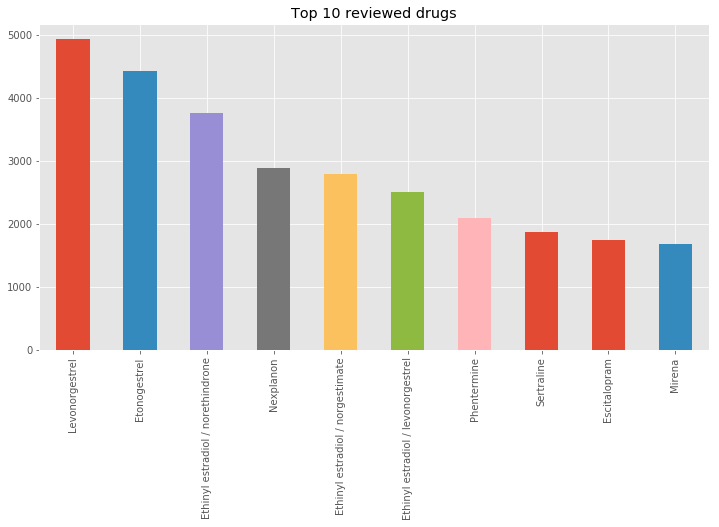

In [8]:
# Top 10 most reviewed drug names
plot = df_all.drugName.value_counts().nlargest(10).plot(kind='bar', title="Top 10 reviewed drugs", figsize=(12,6))

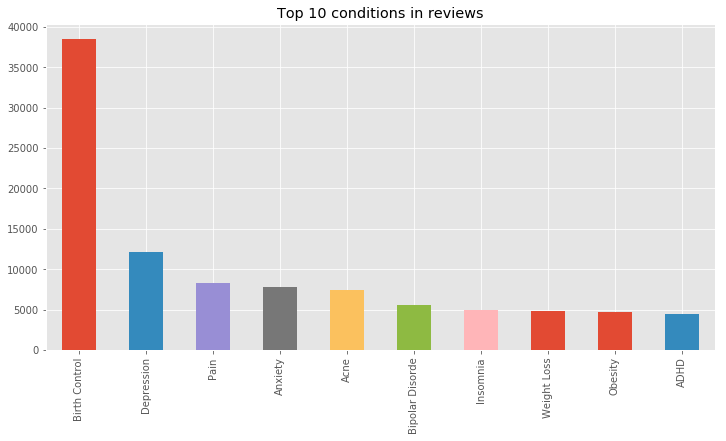

In [9]:
plot = df_all.condition.value_counts().nlargest(10).plot(kind='bar', title="Top 10 conditions in reviews", figsize=(12,6))

Significant number of reviews: More than 30.0 reviews


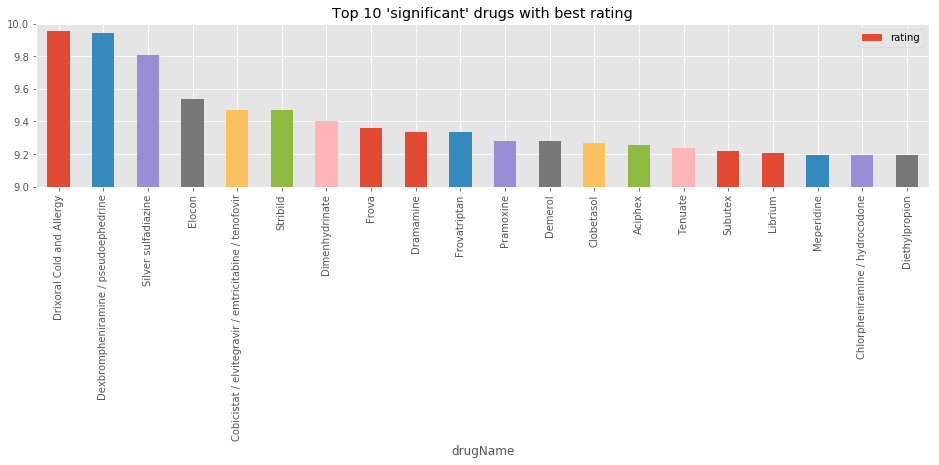

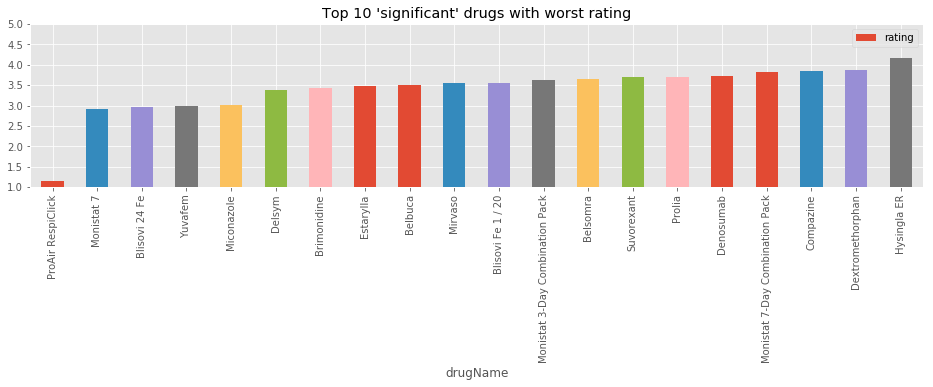

In [10]:
reviews_per_drug = df_all.groupby(["drugName"]).agg({
    "uniqueID": pd.Series.nunique
})
drugs_rating = df_all.groupby('drugName').agg({
    'rating': np.mean,
    'uniqueID': pd.Series.nunique
})

print("Significant number of reviews: More than", reviews_per_drug.quantile(q=0.75).values[0], "reviews")

# We only use the drugs which number of reviews is higher than a threshold
drugs_rating = drugs_rating[drugs_rating['uniqueID'] > int(reviews_per_drug.quantile(q=0.75))]

# Top 10
top_drugs_rating = drugs_rating.nlargest(20, 'rating')
plot = top_drugs_rating.plot(y='rating', kind='bar', figsize = (16, 3))
dummy = plt.title("Top 10 'significant' drugs with best rating") # Assigned to variable to prevent output
dummy = plt.ylim(9, 10) # Assigned to variable to prevent output

# Bottom 10
bottom_drugs_rating = drugs_rating.nsmallest(20, 'rating')
plot = bottom_drugs_rating.plot(y='rating', kind='bar', figsize = (16, 3))
dummy = plt.title("Top 10 'significant' drugs with worst rating") # Assigned to variable to prevent output
dummy = plt.ylim(1, 5) # Assigned to variable to prevent output

Number of pairs (Drug, Condition): 9446
Significant number of reviews: More than 10.0 reviews


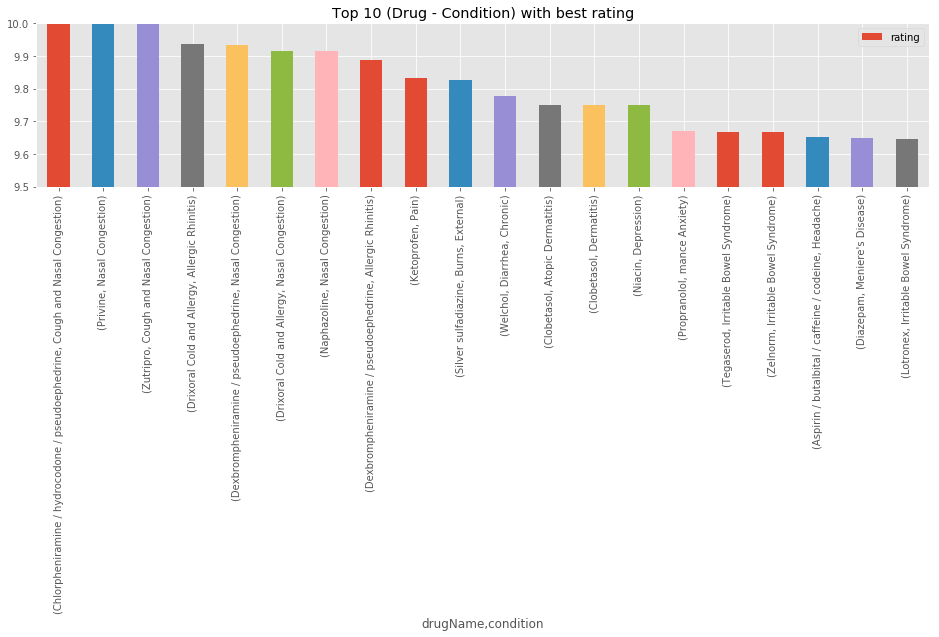

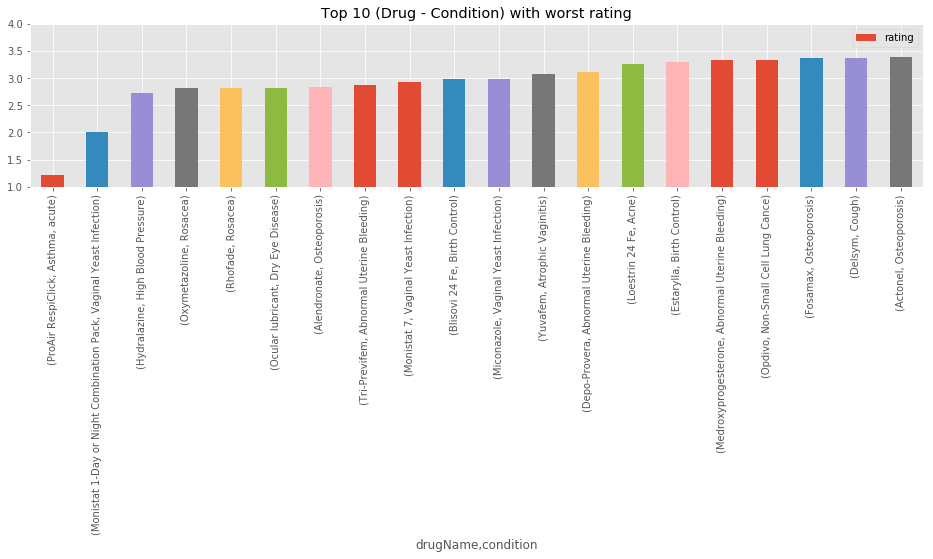

In [11]:
drugs_condition_rating = df_all.groupby(['drugName', 'condition']).agg({
    'rating': np.mean,
    'uniqueID': pd.Series.nunique
})

print("Number of pairs (Drug, Condition):", len(drugs_condition_rating))

print("Significant number of reviews: More than", drugs_condition_rating['uniqueID'].quantile(q=0.75), "reviews")

drugs_condition_rating = drugs_condition_rating[drugs_condition_rating['uniqueID'] > int(drugs_condition_rating['uniqueID'].quantile(q=0.75))]
# drugs_condition_rating.sort_values('rating', ascending=False)
top_drugs_condition_rating = drugs_condition_rating.nlargest(20, 'rating')
plot = top_drugs_condition_rating.plot(y='rating', kind='bar', figsize = (16, 3))
dummy = plt.title("Top 10 (Drug - Condition) with best rating") # Assigned to variable to prevent output
dummy = plt.ylim(9.5, 10) # Assigned to variable to prevent output

bottom_drugs_condition_rating = drugs_condition_rating.nsmallest(20, 'rating')
plot = bottom_drugs_condition_rating.plot(y='rating', kind='bar', figsize = (16, 3))
dummy = plt.title("Top 10 (Drug - Condition) with worst rating") # Assigned to variable to prevent output
dummy = plt.ylim(1, 4) # Assigned to vari

In [12]:
#df_all["date_format"] = df_all["date"].apply( lambda x: datetime.strptime(x, '%d-%b-%y')) # Get date as a date object
# df_all["month"]= df_all["date_format"].apply(lambda x: x.strftime('%m')) # Extract date month
# df_all["year"] = df_all["date_format"].apply(lambda x: x.strftime('%Y')) # Extract date year
# df_all["weekday"] = df_all["date_format"].apply(lambda x: x.strftime('%w')) # Extract date weekday



Text(0.5,1,'Top30 : The number of drugs per condition.')

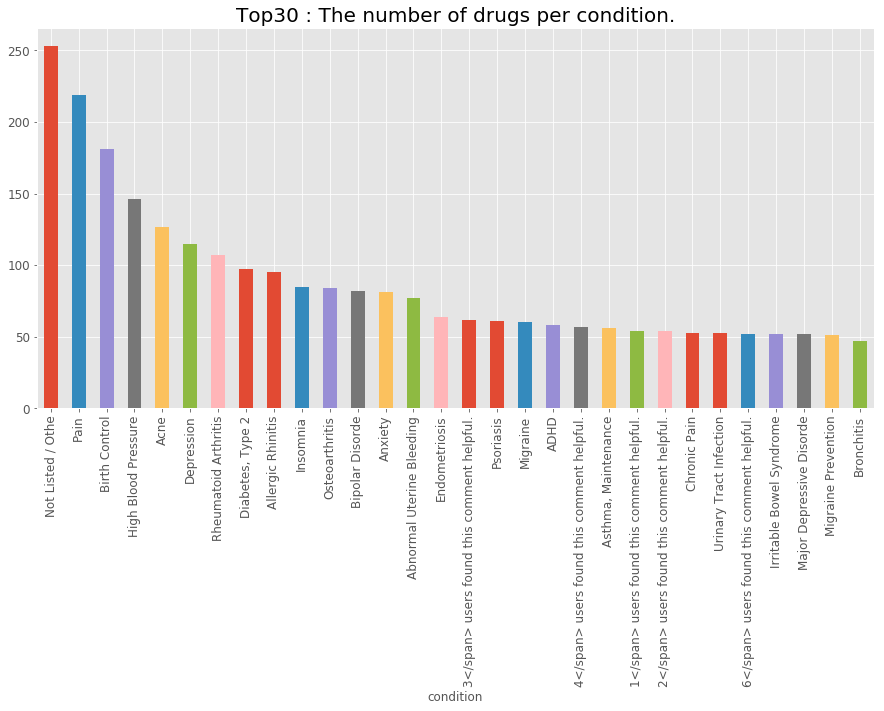

In [13]:
condition_dn = df_all.groupby(['condition'])['drugName'].nunique().sort_values(ascending=False)
condition_dn[0:30].plot(kind="bar", figsize = (15,7), fontsize = 12)
plt.title("Top30 : The number of drugs per condition.", fontsize = 20)

In [14]:
df_all[df_all['condition']=='3</span> users found this comment helpful.'].head(3)

,uniqueID,drugName,condition,review,rating,date,usefulCount
243,81588,Yaz,3</span> users found this comment helpful.,"""I took Yaz for a little over 2 years. From around the age of 16 to 18. I gained a little bit of weight, not much but EXTREMELY hard to lose. Also, I experienced mood swings frequently. Sometimes getting extremely upset and feeling the need to cry. But the reason I stopped taking Yaz was because I started to get EXTREMELY BAD migraines/headaches. These headaches would come VERY frequently. I would say averaging around 2-5 days a week. MIgraines run in my family but funny thing is I never experienced them before the pill. Also, nothing would help these headaches. I took everything from Tylenol to Excedrin Migraine. Nothing helped. Hoped this helped! good luck!""",3,2010-06-01,3
1864,124318,Skyla,3</span> users found this comment helpful.,"""Never pregnant,28,retroverted small (6cm) uterus. My regular Period = severe cramping,vomiting,heavy bleeding,miss work. Skyla recommended to decrease cramping w/ low hormone side effect risk. Negative past experience with other hormonal BCs (nuvaring:extreme fatigue,combo pills:visual migraines,POPs:super depressed &amp; anxious). Insertion was extremely painful but quick. Barely noticeable cramps for 2 days, pain-free after (but vag dryness). After 1 wk, started having excruciating pain caused by laying/sitting(back,stomach,pelvic,upper thigh cramps that woke me from sleep every 3-4 hours,lasting several hours);600mg ibuprofen no help, slow walking did. 4 Days of this,removed (mild pain &amp; quick). Relief was immediate. PPGyno said this was a first in her experience""",1,2015-12-16,3
3322,202848,ProAir HFA,3</span> users found this comment helpful.,"""I get chest colds and asthmatic symptoms in the beginning of the winter for my entire life. This inhaler works better for me than the older ones I&#039;m glad I have it even if I only need it once or twice a year..this is by far the best inhaler I have ever used""",9,2015-12-12,3


Text(0.5,0,'')

Text(0,0.5,'')

Text(0.5,1,'Bottom20 : The number of drugs per condition.')

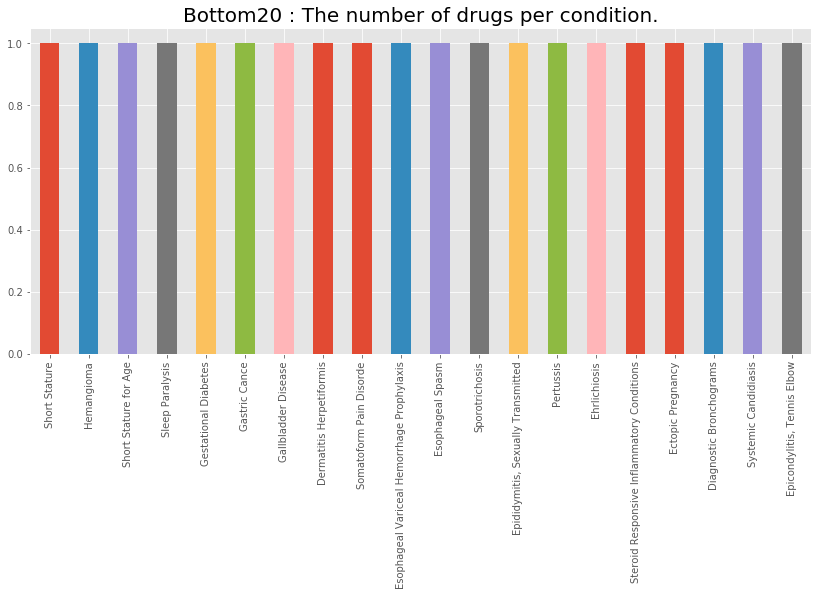

In [15]:
condition_dn = df_all.groupby(['condition'])['drugName'].nunique().sort_values(ascending=False)

condition_dn[condition_dn.shape[0]-20:condition_dn.shape[0]].plot(kind="bar", figsize = (14,6), fontsize = 10)
plt.xlabel("", fontsize = 20)
plt.ylabel("", fontsize = 20)
plt.title("Bottom20 : The number of drugs per condition.", fontsize = 20)

In [16]:
df_train['review'][1]

'"My son is halfway through his fourth week of Intuniv. We became concerned when he began this last week, when he started taking the highest dose he will be on. For two days, he could hardly get out of bed, was very cranky, and slept for nearly 8 hours on a drive home from school vacation (very unusual for him.) I called his doctor on Monday morning and she said to stick it out a few days. See how he did at school, and with getting up in the morning. The last two days have been problem free. He is MUCH more agreeable than ever. He is less emotional (a good thing), less cranky. He is remembering all the things he should. Overall his behavior is better. \r\nWe have tried many different medications and so far this is the most effective."'

In [17]:
df_train['review'][2]

'"I used to take another oral contraceptive, which had 21 pill cycle, and was very happy- very light periods, max 5 days, no other side effects. But it contained hormone gestodene, which is not available in US, so I switched to Lybrel, because the ingredients are similar. When my other pills ended, I started Lybrel immediately, on my first day of period, as the instructions said. And the period lasted for two weeks. When taking the second pack- same two weeks. And now, with third pack things got even worse- my third period lasted for two weeks and now it&#039;s the end of the third week- I still have daily brown discharge.\r\nThe positive side is that I didn&#039;t have any other side effects. The idea of being period free was so tempting... Alas."'

In [18]:
from collections import defaultdict
df_all_6_10 = df_all[df_all["rating"]>5]
df_all_1_5 = df_all[df_all["rating"]<6]

In [19]:
from wordcloud import WordCloud, STOPWORDS


## custom function for ngram generation ##
def generate_ngrams(text, n_gram=1):
    token = [token for token in text.lower().split(" ") if token != "" if token not in STOPWORDS]
    ngrams = zip(*[token[i:] for i in range(n_gram)])
    return [" ".join(ngram) for ngram in ngrams]

## custom function for horizontal bar chart ##
def horizontal_bar_chart(df, color):
    trace = go.Bar(
        y=df["word"].values[::-1],
        x=df["wordcount"].values[::-1],
        showlegend=False,
        orientation = 'h',
        marker=dict(
            color=color,
        ),
    )
    return trace

## Get the bar chart from rating  8 to 10 review ##
freq_dict = defaultdict(int)
for sent in df_all_1_5["review"]:
    for word in generate_ngrams(sent):
        freq_dict[word] += 1
fd_sorted = pd.DataFrame(sorted(freq_dict.items(), key=lambda x: x[1])[::-1])
fd_sorted.columns = ["word", "wordcount"]
trace0 = horizontal_bar_chart(fd_sorted.head(50), 'blue')

## Get the bar chart from rating  4 to 7 review ##
freq_dict = defaultdict(int)
for sent in df_all_6_10["review"]:
    for word in generate_ngrams(sent):
        freq_dict[word] += 1
fd_sorted = pd.DataFrame(sorted(freq_dict.items(), key=lambda x: x[1])[::-1])
fd_sorted.columns = ["word", "wordcount"]
trace1 = horizontal_bar_chart(fd_sorted.head(50), 'blue')

# Creating two subplots
fig = tools.make_subplots(rows=1, cols=2, vertical_spacing=0.04,
                          subplot_titles=["Frequent words of rating 1 to 5", 
                                          "Frequent words of rating 6 to 10"])
fig.append_trace(trace0, 1, 1)
fig.append_trace(trace1, 1, 2)
fig['layout'].update(height=1200, width=900, paper_bgcolor='rgb(233,233,233)', title="Word Count Plots")
py.iplot(fig, filename='word-plots')

C:\Users\somes\Anaconda3\lib\site-packages\plotly\tools.py:465: DeprecationWarning:

plotly.tools.make_subplots is deprecated, please use plotly.subplots.make_subplots instead



Layout({
    'annotations': [{'font': {'size': 16},
                     'showarrow': False,
                     'text': 'Frequent words of rating 1 to 5',
                     'x': 0.225,
                     'xanchor': 'center',
                     'xref': 'paper',
                     'y': 1.0,
                     'yanchor': 'bottom',
                     'yref': 'paper'},
                    {'font': {'size': 16},
                     'showarrow': False,
                     'text': 'Frequent words of rating 6 to 10',
                     'x': 0.775,
                     'xanchor': 'center',
                     'xref': 'paper',
                     'y': 1.0,
                     'yanchor': 'bottom',
                     'yref': 'paper'}],
    'height': 1200,
    'paper_bgcolor': 'rgb(233,233,233)',
    'template': '...',
    'title': {'text': 'Word Count Plots'},
    'width': 900,
    'xaxis': {'anchor': 'y', 'domain': [0.0, 0.45]},
    'xaxis2': {'anchor': 'y2', 'domain': [0.5

In [20]:
freq_dict = defaultdict(int)
for sent in df_all_1_5["review"]:
    for word in generate_ngrams(sent,2):
        freq_dict[word] += 1
fd_sorted = pd.DataFrame(sorted(freq_dict.items(), key=lambda x: x[1])[::-1])
fd_sorted.columns = ["word", "wordcount"]
trace1 = horizontal_bar_chart(fd_sorted.head(50), 'orange')

freq_dict = defaultdict(int)
for sent in df_all_6_10["review"]:
    for word in generate_ngrams(sent,2):
        freq_dict[word] += 1
fd_sorted = pd.DataFrame(sorted(freq_dict.items(), key=lambda x: x[1])[::-1])
fd_sorted.columns = ["word", "wordcount"]
trace2 = horizontal_bar_chart(fd_sorted.head(50), 'orange')

# Creating two subplots
fig = tools.make_subplots(rows=1, cols=2, vertical_spacing=0.04,horizontal_spacing=0.15,
                          subplot_titles=["Frequent biagrams of rating 1 to 5", 
                                          "Frequent biagrams of rating 6 to 10"])
fig.append_trace(trace1, 1, 1)
fig.append_trace(trace2, 1, 2)
fig['layout'].update(height=1200, width=1000, paper_bgcolor='rgb(233,233,233)', title="Bigram Count Plots")
py.iplot(fig, filename='word-plots')

C:\Users\somes\Anaconda3\lib\site-packages\plotly\tools.py:465: DeprecationWarning:

plotly.tools.make_subplots is deprecated, please use plotly.subplots.make_subplots instead



Layout({
    'annotations': [{'font': {'size': 16},
                     'showarrow': False,
                     'text': 'Frequent biagrams of rating 1 to 5',
                     'x': 0.2125,
                     'xanchor': 'center',
                     'xref': 'paper',
                     'y': 1.0,
                     'yanchor': 'bottom',
                     'yref': 'paper'},
                    {'font': {'size': 16},
                     'showarrow': False,
                     'text': 'Frequent biagrams of rating 6 to 10',
                     'x': 0.7875,
                     'xanchor': 'center',
                     'xref': 'paper',
                     'y': 1.0,
                     'yanchor': 'bottom',
                     'yref': 'paper'}],
    'height': 1200,
    'paper_bgcolor': 'rgb(233,233,233)',
    'template': '...',
    'title': {'text': 'Bigram Count Plots'},
    'width': 1000,
    'xaxis': {'anchor': 'y', 'domain': [0.0, 0.425]},
    'xaxis2': {'anchor': 'y2', 'd

Text(0.5,0,'')

Text(0,0.5,'')

Text(0.5,1,'Count of rating values')

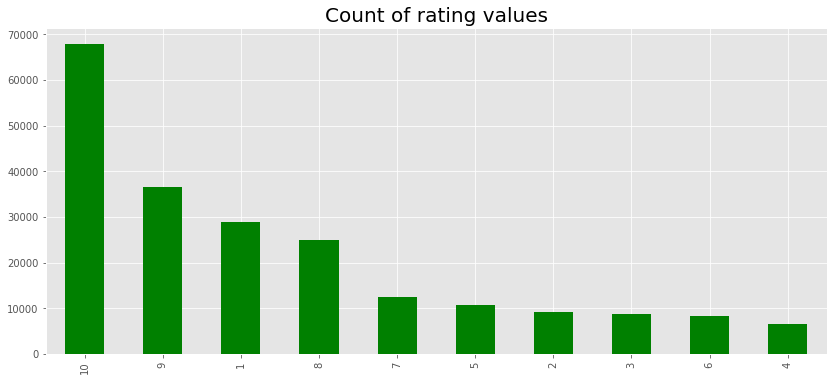

In [21]:
rating = df_all['rating'].value_counts().sort_values(ascending=False)
rating.plot(kind="bar", figsize = (14,6), fontsize = 10,color="green")
plt.xlabel("", fontsize = 20)
plt.ylabel("", fontsize = 20)
plt.title("Count of rating values", fontsize = 20)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

Text(0.5,0,'year')

Text(0,0.5,'')

Text(0.5,1,'Number of reviews in year')

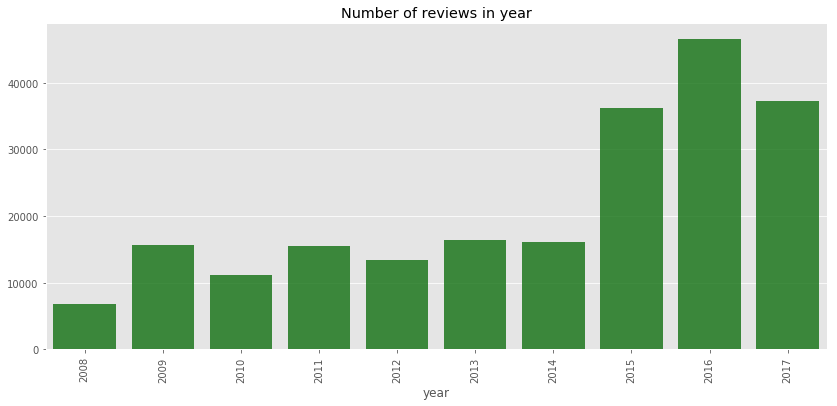

In [22]:
cnt_srs = df_all['date'].dt.year.value_counts()
cnt_srs = cnt_srs.sort_index()
plt.figure(figsize=(14,6))
sns.barplot(cnt_srs.index, cnt_srs.values, alpha=0.8, color='green')
plt.xticks(rotation='vertical')
plt.xlabel('year', fontsize=12)
plt.ylabel('', fontsize=12)
plt.title("Number of reviews in year")
plt.show()

Text(0.5,0,'')

Text(0,0.5,'')

Text(0.5,1,'Mean rating in year')

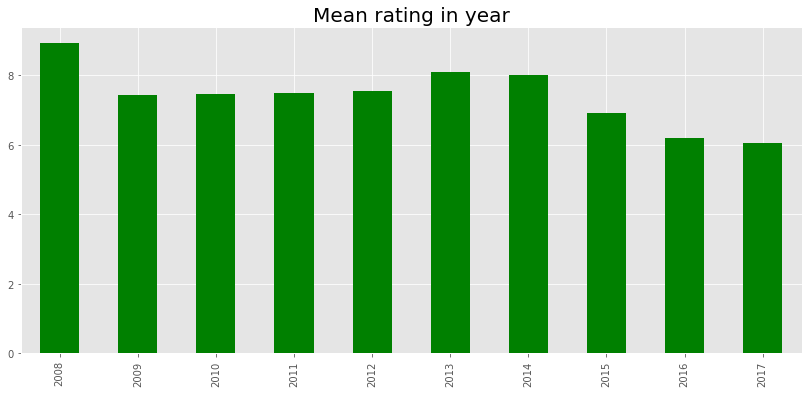

In [23]:
df_all['year'] = df_all['date'].dt.year
rating = df_all.groupby('year')['rating'].mean()
rating.plot(kind="bar", figsize = (14,6), fontsize = 10,color="green")
plt.xlabel("", fontsize = 20)
plt.ylabel("", fontsize = 20)
plt.title("Mean rating in year", fontsize = 20)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 <a list of 12 Text xticklabel objects>)

Text(0.5,0,'month')

Text(0,0.5,'')

Text(0.5,1,'Number of reviews in month')

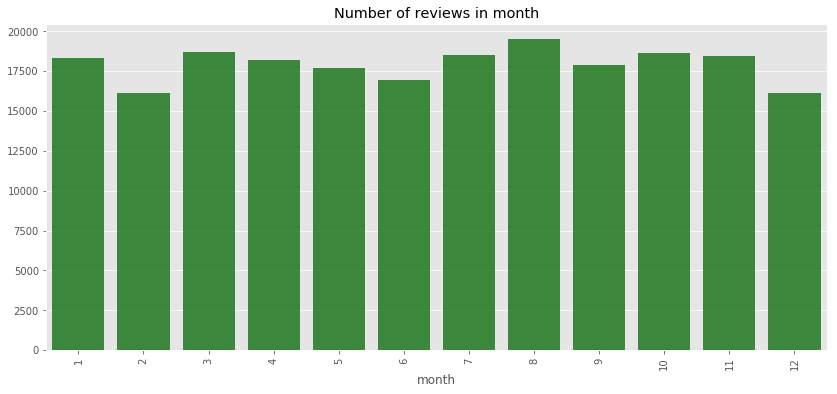

In [24]:
cnt_srs = df_all['date'].dt.month.value_counts()
cnt_srs = cnt_srs.sort_index()
plt.figure(figsize=(14,6))
sns.barplot(cnt_srs.index, cnt_srs.values, alpha=0.8, color='green')
plt.xticks(rotation='vertical')
plt.xlabel('month', fontsize=12)
plt.ylabel('', fontsize=12)
plt.title("Number of reviews in month")
plt.show()

Text(0.5,0,'')

Text(0,0.5,'')

Text(0.5,1,'Mean rating in month')

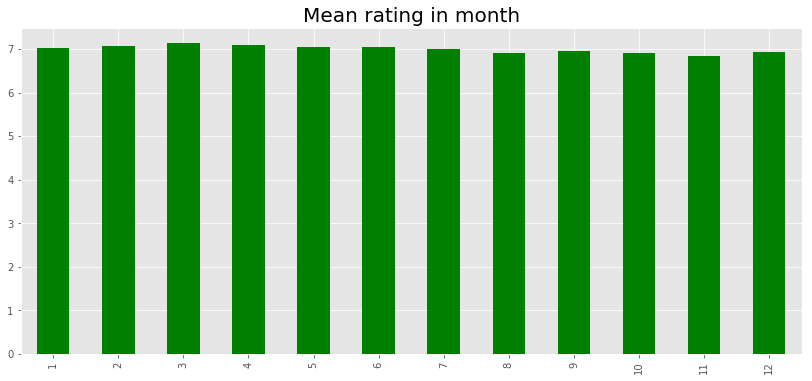

In [25]:
df_all['month'] = df_all['date'].dt.month
rating = df_all.groupby('month')['rating'].mean()
rating.plot(kind="bar", figsize = (14,6), fontsize = 10,color="green")
plt.xlabel("", fontsize = 20)
plt.ylabel("", fontsize = 20)
plt.title("Mean rating in month", fontsize = 20)

Text(0.5,0,'')

Text(0,0.5,'')

Text(0.5,1,'Mean rating in day')

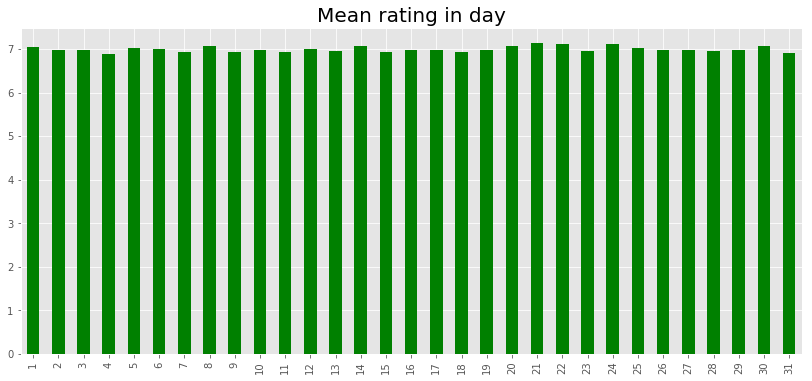

In [26]:
df_all['day'] = df_all['date'].dt.day
rating = df_all.groupby('day')['rating'].mean()
rating.plot(kind="bar", figsize = (14,6), fontsize = 10,color="green")
plt.xlabel("", fontsize = 20)
plt.ylabel("", fontsize = 20)
plt.title("Mean rating in day", fontsize = 20)

(array([-200.,    0.,  200.,  400.,  600.,  800., 1000., 1200., 1400.]),
 <a list of 9 Text xticklabel objects>)

Text(0.5,0,'')

Text(0,0.5,'')

Text(0.5,1,'Distribution of usefulCount')

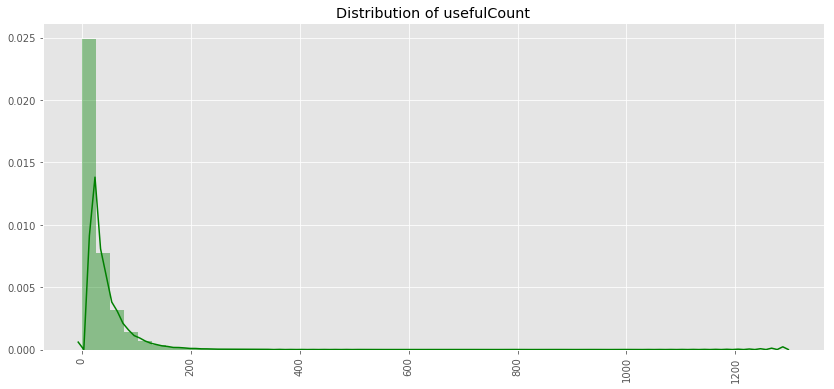

In [27]:
plt.figure(figsize=(14,6))
sns.distplot(df_all["usefulCount"].dropna(),color="green")
plt.xticks(rotation='vertical')
plt.xlabel('', fontsize=12)
plt.ylabel('', fontsize=12)
plt.title("Distribution of usefulCount")
plt.show()

In [28]:
df_all["usefulCount"].describe()

count    215063.000000
mean     28.001004    
std      36.346069    
min      0.000000     
25%      6.000000     
50%      16.000000    
75%      36.000000    
max      1291.000000  
Name: usefulCount, dtype: float64

## Missing values

Text(0.5,0,'Columns')

Text(0,0.5,'')

Text(0.5,1,'Total Missing Value ')

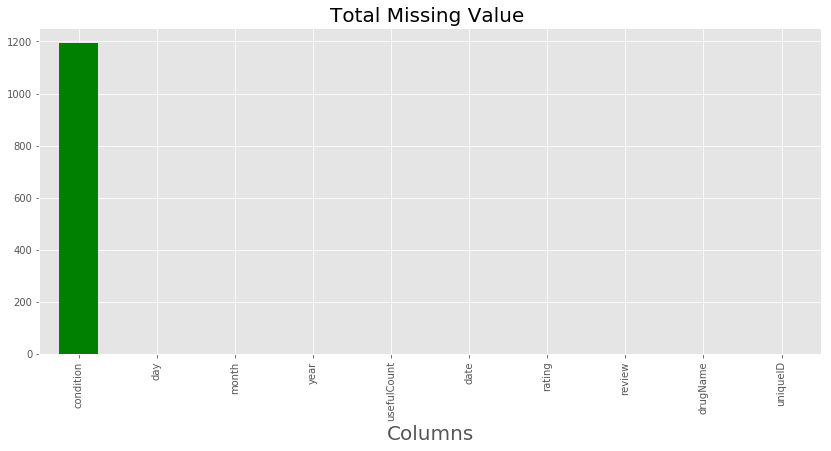

In [29]:
percent = (df_all.isnull().sum()).sort_values(ascending=False)
percent.plot(kind="bar", figsize = (14,6), fontsize = 10, color='green')
plt.xlabel("Columns", fontsize = 20)
plt.ylabel("", fontsize = 20)
plt.title("Total Missing Value ", fontsize = 20)

In [30]:
print("Missing value (%):", 1200/df_all.shape[0] *100)

Missing value (%): 0.5579760349292998


## Data Preprocessing

### Removing missing values

In [31]:
df_train = df_train.dropna(axis=0)
df_test = df_test.dropna(axis=0)

Text(0.5,0,'Columns')

Text(0,0.5,'')

Text(0.5,1,'Total Missing Value ')

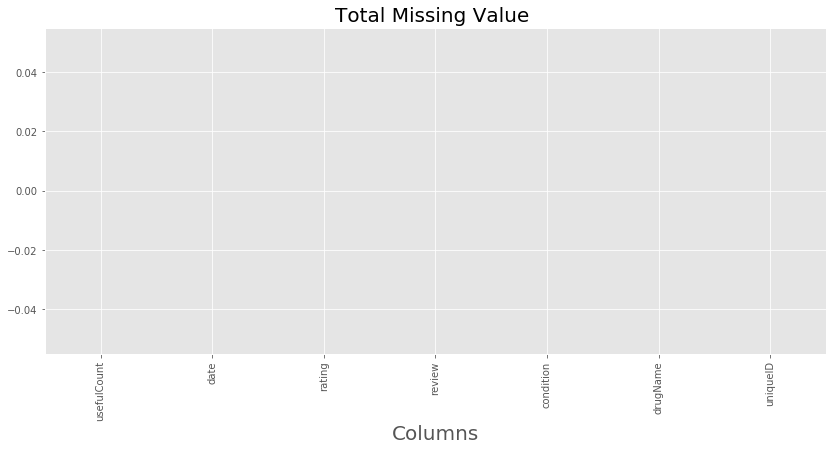

In [32]:
df_all = pd.concat([df_train,df_test]).reset_index()
del df_all['index']
percent = (df_all.isnull().sum()).sort_values(ascending=False)
percent.plot(kind="bar", figsize = (14,6), fontsize = 10, color='green')
plt.xlabel("Columns", fontsize = 20)
plt.ylabel("", fontsize = 20)
plt.title("Total Missing Value ", fontsize = 20)

In [33]:
all_list = set(df_all.index)
span_list = []
for i,j in enumerate(df_all['condition']):
    if '</span>' in j:
        span_list.append(i)

In [34]:
new_idx = all_list.difference(set(span_list))
df_all = df_all.iloc[list(new_idx)].reset_index()
del df_all['index']

In [35]:
df_condition = df_all.groupby(['condition'])['drugName'].nunique().sort_values(ascending=False)
df_condition = pd.DataFrame(df_condition).reset_index()
df_condition.tail(20)

,condition,drugName
816,Hemangioma,1
817,Q Feve,1
818,Urinary Retention,1
819,Diagnostic Bronchograms,1
820,Steroid Responsive Inflammatory Conditions,1
821,Cluster-Tic Syndrome,1
822,Nausea (phosphorated carbohydrate solution),1
823,Ramsay Hunt Syndrome,1
824,Rat-bite Feve,1
825,Hemorrhoids (pramoxine / zinc oxide),1


In [36]:
df_condition_1 = df_condition[df_condition['drugName']==1].reset_index()
df_condition_1['condition'][0:10]

0    Uveitis, Posteri                       
1    Pseudogout, Prophylaxis                
2    Infectious Diarrhea                    
3    Thyroid Suppression Test               
4    Angioedema                             
5    Scleroderma                            
6    mis                                    
7    Anti NMDA Receptor Encephalitis        
8    mist (                                 
9    Pruritus of Partial Biliary Obstruction
Name: condition, dtype: object

In [37]:
all_list = set(df_all.index)
condition_list = []
for i,j in enumerate(df_all['condition']):
    for c in list(df_condition_1['condition']):
        if j == c:
            condition_list.append(i)
            
new_idx = all_list.difference(set(condition_list))
df_all = df_all.iloc[list(new_idx)].reset_index()
del df_all['index']

In [38]:
from bs4 import BeautifulSoup
import nltk
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer

In [39]:
stops = set(stopwords.words('english'))

In [40]:
not_stop = ["aren't","couldn't","didn't","doesn't","don't","hadn't","hasn't","haven't","isn't","mightn't","mustn't","needn't","no","nor","not","shan't","shouldn't","wasn't","weren't","wouldn't"]
for i in not_stop:
    stops.remove(i)

In [41]:
stemmer = SnowballStemmer('english')

def review_to_words(raw_review):
    # 1. Delete HTML 
    review_text = BeautifulSoup(raw_review, 'html.parser').get_text()
    # 2. Make a space
    letters_only = re.sub('[^a-zA-Z]', ' ', review_text)
    # 3. lower letters
    words = letters_only.lower().split()
    # 5. Stopwords 
    meaningful_words = [w for w in words if not w in stops]
    # 6. Stemming
    stemming_words = [stemmer.stem(w) for w in meaningful_words]
    # 7. space join words
    return( ' '.join(stemming_words))

In [42]:
df_all['review_clean'] = df_all['review'].apply(review_to_words)

# Model

In [43]:
df_all['sentiment'] = df_all["rating"].apply(lambda x: 1 if x > 5 else 0)

In [44]:
df_all

,uniqueID,drugName,condition,review,rating,date,usefulCount,review_clean,sentiment
0,206461,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combination of Bystolic 5 Mg and Fish Oil""",9,2012-05-20,27,no side effect take combin bystol mg fish oil,1
1,95260,Guanfacine,ADHD,"""My son is halfway through his fourth week of Intuniv. We became concerned when he began this last week, when he started taking the highest dose he will be on. For two days, he could hardly get out of bed, was very cranky, and slept for nearly 8 hours on a drive home from school vacation (very unusual for him.) I called his doctor on Monday morning and she said to stick it out a few days. See how he did at school, and with getting up in the morning. The last two days have been problem free. He is MUCH more agreeable than ever. He is less emotional (a good thing), less cranky. He is remembering all the things he should. Overall his behavior is better. \r\nWe have tried many different medications and so far this is the most effective.""",8,2010-04-27,192,son halfway fourth week intuniv becam concern began last week start take highest dose two day could hard get bed cranki slept near hour drive home school vacat unusu call doctor monday morn said stick day see school get morn last two day problem free much agreeabl ever less emot good thing less cranki rememb thing overal behavior better tri mani differ medic far effect,1
2,92703,Lybrel,Birth Control,"""I used to take another oral contraceptive, which had 21 pill cycle, and was very happy- very light periods, max 5 days, no other side effects. But it contained hormone gestodene, which is not available in US, so I switched to Lybrel, because the ingredients are similar. When my other pills ended, I started Lybrel immediately, on my first day of period, as the instructions said. And the period lasted for two weeks. When taking the second pack- same two weeks. And now, with third pack things got even worse- my third period lasted for two weeks and now it&#039;s the end of the third week- I still have daily brown discharge.\r\nThe positive side is that I didn&#039;t have any other side effects. The idea of being period free was so tempting... Alas.""",5,2009-12-14,17,use take anoth oral contracept pill cycl happi light period max day no side effect contain hormon gestoden not avail us switch lybrel ingredi similar pill end start lybrel immedi first day period instruct said period last two week take second pack two week third pack thing got even wors third period last two week end third week still daili brown discharg posit side side effect idea period free tempt ala,0
3,138000,Ortho Evra,Birth Control,"""This is my first time using any form of birth control. I&#039;m glad I went with the patch, I have been on it for 8 months. At first It decreased my libido but that subsided. The only downside is that it made my periods longer (5-6 days to be exact) I used to only have periods for 3-4 days max also made my cramps intense for the first two days of my period, I never had cramps before using birth control. Other than that in happy with the patch""",8,2015-11-03,10,first time use form birth control glad went patch month first decreas libido subsid downsid made period longer day exact use period day max also made cramp intens first two day period never cramp use birth control happi patch,1
4,35696,Buprenorphine / naloxone,Opiate Dependence,"""Suboxone has completely turned my life around. I feel healthier, I&#039;m excelling at my job and I always have money in my pocket and my savings account. I had none of those before Suboxone and spent years abusing oxycontin. My paycheck was already spent by the time I got it and I started resorting to scheming and stealing to fund my addiction. All that is history. If you&#039;re ready to stop, there&#039;s a good chance that suboxone will put you on the path of great life again. I have found the side-effects to be minimal compared to oxycontin. I&#0

In [45]:
from sklearn.model_selection import train_test_split
df_train, df_test = train_test_split(df_all, test_size=0.33, random_state=42)

In [46]:
df_train.shape

(142075, 9)

In [47]:
df_test.shape

(69978, 9)

In [48]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.pipeline import Pipeline

vectorizer = CountVectorizer(analyzer = 'word', 
                             tokenizer = None,
                             preprocessor = None, 
                             stop_words = None, 
                             min_df = 2,
                             ngram_range=(4, 4),
                             max_features = 20000
                            )

In [49]:
vectorizer

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=20000, min_df=2,
        ngram_range=(4, 4), preprocessor=None, stop_words=None,
        strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)

In [50]:
pipeline = Pipeline([
    ('vect', vectorizer),
])

In [51]:
train_data_features = pipeline.fit_transform(df_train['review_clean'])
test_data_features = pipeline.fit_transform(df_test['review_clean'])

In [52]:
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense, Bidirectional, LSTM, BatchNormalization, Dropout
from tensorflow.python.keras.preprocessing.sequence import pad_sequences

In [53]:
import numpy as np
import keras
from keras.models import Sequential
from keras.layers import Dense
import random

# 1. Dataset
y_train = df_train['sentiment']
y_test = df_test['sentiment']
solution = y_test.copy()

# 2. Model Structure
model = keras.models.Sequential()

model.add(keras.layers.Dense(200, input_shape=(20000,)))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Activation('relu'))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(300))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Activation('relu'))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dense(1, activation='sigmoid'))

# 3. Model compile
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

Using TensorFlow backend.


### model.summary()

Epoch 1/10
142075/142075 [==============================] - 348s 2ms/step - loss: 0.5805 - acc: 0.7139
Epoch 2/10
142075/142075 [==============================] - 334s 2ms/step - loss: 0.4987 - acc: 0.7584
Epoch 3/10
142075/142075 [==============================] - 301s 2ms/step - loss: 0.4625 - acc: 0.7752
Epoch 4/10
142075/142075 [==============================] - 314s 2ms/step - loss: 0.4419 - acc: 0.7840
Epoch 5/10
142075/142075 [==============================] - 325s 2ms/step - loss: 0.4283 - acc: 0.7898
Epoch 6/10
142075/142075 [==============================] - 340s 2ms/step - loss: 0.4184 - acc: 0.7944
Epoch 7/10
142075/142075 [==============================] - 302s 2ms/step - loss: 0.4121 - acc: 0.7973
Epoch 8/10
142075/142075 [==============================] - 317s 2ms/step - loss: 0.4067 - acc: 0.7996
Epoch 9/10
142075/142075 [==============================] - 376s 3ms/step - loss: 0.4015 - acc: 0.8019
Epoch 10/10
142075/142075 [==============================] - 390s 3ms/ste

(0.0, 1.0)

(0.0, 1.0)

Text(0.5,0,'epoch')

Text(0,0.5,'loss')

Text(0,0.5,'accuray')

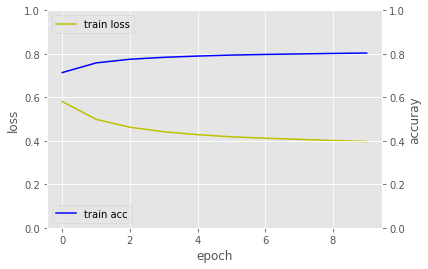

69978/69978 [==============================] - 60s 855us/step
loss_and_metrics : [1.0457850158539943, 0.6471319557541167]


In [54]:
hist = model.fit(train_data_features, y_train, epochs=10, batch_size=64)

# 5. Traing process
%matplotlib inline
import matplotlib.pyplot as plt

fig, loss_ax = plt.subplots()

acc_ax = loss_ax.twinx()

loss_ax.set_ylim([0.0, 1.0])
acc_ax.set_ylim([0.0, 1.0])

loss_ax.plot(hist.history['loss'], 'y', label='train loss')
acc_ax.plot(hist.history['acc'], 'b', label='train acc')

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuray')

loss_ax.legend(loc='upper left')
acc_ax.legend(loc='lower left')

plt.show()

# 6. Evaluation
loss_and_metrics = model.evaluate(test_data_features, y_test, batch_size=32)
print('loss_and_metrics : ' + str(loss_and_metrics))

In [55]:
sub_preds_deep = model.predict(test_data_features,batch_size=32)

In [56]:
!pip install lightgbm

In [57]:
from sklearn.metrics import roc_auc_score, precision_recall_curve, roc_curve, average_precision_score
from sklearn.model_selection import KFold
from lightgbm import LGBMClassifier
from sklearn.metrics import confusion_matrix

#folds = KFold(n_splits=5, shuffle=True, random_state=546789)
target = df_train['sentiment']
feats = ['usefulCount']

sub_preds = np.zeros(df_test.shape[0])

trn_x, val_x, trn_y, val_y = train_test_split(df_train[feats], target, test_size=0.2, random_state=42) 
feature_importance_df = pd.DataFrame() 
    
clf = LGBMClassifier(
        n_estimators=2000,
        learning_rate=0.05,
        num_leaves=30,
        #colsample_bytree=.9,
        subsample=.9,
        max_depth=7,
        reg_alpha=.1,
        reg_lambda=.1,
        min_split_gain=.01,
        min_child_weight=2,
        silent=-1,
        verbose=-1,
        )
        
clf.fit(trn_x, trn_y, 
        eval_set= [(trn_x, trn_y), (val_x, val_y)], 
        verbose=100, early_stopping_rounds=100  #30
    )

sub_preds = clf.predict(df_test[feats])
        
fold_importance_df = pd.DataFrame()
fold_importance_df["feature"] = feats
fold_importance_df["importance"] = clf.feature_importances_
feature_importance_df = pd.concat([feature_importance_df, fold_importance_df], axis=0)

Training until validation scores don't improve for 100 rounds
[100]	training's binary_logloss: 0.570406	valid_1's binary_logloss: 0.572234
[200]	training's binary_logloss: 0.570206	valid_1's binary_logloss: 0.572221
Early stopping, best iteration is:
[168]	training's binary_logloss: 0.570241	valid_1's binary_logloss: 0.572209


LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
        importance_type='split', learning_rate=0.05, max_depth=7,
        min_child_samples=20, min_child_weight=2, min_split_gain=0.01,
        n_estimators=2000, n_jobs=-1, num_leaves=30, objective=None,
        random_state=None, reg_alpha=0.1, reg_lambda=0.1, silent=-1,
        subsample=0.9, subsample_for_bin=200000, subsample_freq=0,
        verbose=-1)

In [58]:
solution = df_test['sentiment']
confusion_matrix(y_pred=sub_preds, y_true=solution)

array([[    0, 21009],
       [    0, 48969]], dtype=int64)

In [59]:
len_train = df_train.shape[0]
df_all = pd.concat([df_train,df_test])
del df_train, df_test;
gc.collect()

12583

In [60]:
df_all['date'] = pd.to_datetime(df_all['date'])
df_all['day'] = df_all['date'].dt.day
df_all['year'] = df_all['date'].dt.year
df_all['month'] = df_all['date'].dt.month

In [61]:
!pip install textblob

In [62]:
from textblob import TextBlob
from tqdm import tqdm
reviews = df_all['review_clean']

Predict_Sentiment = []
for review in tqdm(reviews):
    blob = TextBlob(review)
    Predict_Sentiment += [blob.sentiment.polarity]
df_all["Predict_Sentiment"] = Predict_Sentiment
df_all.head()

100%|████████████████████████████████████████████████████████████████████████| 212053/212053 [03:11<00:00, 1106.37it/s]


,uniqueID,drugName,condition,review,rating,date,usefulCount,review_clean,sentiment,day,year,month,Predict_Sentiment
130185,66913,Seroquel,Generalized Anxiety Disorde,"""After trying nearly every SSRI on the market I was placed on Pristiq, which improved my condition somewhat, but still left me dependent on Xanax to alleviate my daily anxiety. After a particularly bad stretch I was also placed on Seroquel XR. It has helped more than I could have ever hoped for. I finally don&#039;t have to reach for a Xanax as soon as I wake up. It was very sedating for the first week after I started, and after increasing my dosage, but this has lessened with time. I do make sure to take it before bed, as it does make me tired as it kicks in, but I welcome this due to my problems with insomnia.""",9,2010-11-26,102,tri near everi ssri market place pristiq improv condit somewhat still left depend xanax allevi daili anxieti particular bad stretch also place seroquel xr help could ever hope final reach xanax soon wake sedat first week start increas dosag lessen time make sure take bed make tire kick welcom due problem insomnia,1,26,2010,11,0.023958
155501,222222,Fluconazole,"Onychomycosis, Toenail","""This takes 6+ months, but did clear up a decades long infection.""",9,2008-05-03,39,take month clear decad long infect,1,3,2008,5,0.025000
75325,75807,Temazepam,Insomnia,"""Worked for awhile pretty well but then went back to maybe getting 2 hours of sleep a night if i was lucky! I need help and i feel so anxious i need something to help me with this horrible insomnia.""",2,2016-04-21,15,work awhil pretti well went back mayb get hour sleep night lucki need help feel anxious need someth help horribl insomnia,0,21,2016,4,-0.125000
19174,229747,Ketamine,Pain,"""I was given this after surgery for pain as I can&#039;t have morphine and they tried 5 other drugs to sort me out before this. Omg I went on a wild trip I went thru dimensions of colour and walls, I couldn&#039;t get back into my body I thought I had died. Scary scary stuff. When I came out of the trip I was dizzy and seeing double, my pain was gone but didn&#039;t enjoy the experience at all.""",1,2016-04-16,19,given surgeri pain morphin tri drug sort omg went wild trip went thru dimens colour wall get back bodi thought die scari scari stuff came trip dizzi see doubl pain gone enjoy experi,0,16,2016,4,0.166667
209735,102495,Aripiprazole,Major Depressive Disorde,"""Abilify served me well over a two month period. Of all of the antidepressants that I have taken over the past 20 years, I would give Abilify the highest rating. However, one of its potential side effects can be significantly increased blood glucose levels in some Type 1 diabetics. Unfortunately I was one of these and I was never able to control these levels within an acceptable range and I had to discontinue Abilify as a result. These statements should be taken with caution since I was only able to take the drug for 8 weeks. I noted no other serious side-effects. I do suffer from ED but this is as much a result of 40 years of Type 1 diabetes as of any other factor.""",9,2016-12-16,5,abilifi serv well two month period antidepress taken past year would give abilifi highest rate howev one potenti side effect signific increas blood glucos level type diabet unfortun one never abl control level within accept rang discontinu abilifi result statement taken caution sinc abl take drug week note no serious side effect suffer ed much result year type diabet factor,1,16,2016,12,0.038889


In [63]:
np.corrcoef(df_all["Predict_Sentiment"], df_all["rating"])

array([[1.        , 0.25709864],
       [0.25709864, 1.        ]])

In [64]:
np.corrcoef(df_all["Predict_Sentiment"], df_all["sentiment"])

array([[1.        , 0.23518272],
       [0.23518272, 1.        ]])

In [65]:

df_all['count_sent']=df_all["review"].apply(lambda x: len(re.findall("\n",str(x)))+1)

#Word count in each comment:
df_all['count_word']=df_all["review_clean"].apply(lambda x: len(str(x).split()))

#Unique word count
df_all['count_unique_word']=df_all["review_clean"].apply(lambda x: len(set(str(x).split())))

#Letter count
df_all['count_letters']=df_all["review_clean"].apply(lambda x: len(str(x)))

#punctuation count
df_all["count_punctuations"] = df_all["review"].apply(lambda x: len([c for c in str(x) if c in string.punctuation]))

#upper case words count
df_all["count_words_upper"] = df_all["review"].apply(lambda x: len([w for w in str(x).split() if w.isupper()]))

#title case words count
df_all["count_words_title"] = df_all["review"].apply(lambda x: len([w for w in str(x).split() if w.istitle()]))

#Number of stopwords
df_all["count_stopwords"] = df_all["review"].apply(lambda x: len([w for w in str(x).lower().split() if w in stops]))

#Average length of the wordsb
df_all["mean_word_len"] = df_all["review_clean"].apply(lambda x: np.mean([len(w) for w in str(x).split()]))

In [66]:
df_all['season'] = df_all["month"].apply(lambda x: 1 if ((x>2) & (x<6)) else(2 if (x>5) & (x<9) else (3 if (x>8) & (x<12) else 4)))

In [67]:
df_train = df_all[:len_train]
df_test = df_all[len_train:]

In [68]:
df_all.head()

,uniqueID,drugName,condition,review,rating,date,usefulCount,review_clean,sentiment,day,year,month,Predict_Sentiment,count_sent,count_word,count_unique_word,count_letters,count_punctuations,count_words_upper,count_words_title,count_stopwords,mean_word_len,season
130185,66913,Seroquel,Generalized Anxiety Disorde,"""After trying nearly every SSRI on the market I was placed on Pristiq, which improved my condition somewhat, but still left me dependent on Xanax to alleviate my daily anxiety. After a particularly bad stretch I was also placed on Seroquel XR. It has helped more than I could have ever hoped for. I finally don&#039;t have to reach for a Xanax as soon as I wake up. It was very sedating for the first week after I started, and after increasing my dosage, but this has lessened with time. I do make sure to take it before bed, as it does make me tired as it kicks in, but I welcome this due to my problems with insomnia.""",9,2010-11-26,102,tri near everi ssri market place pristiq improv condit somewhat still left depend xanax allevi daili anxieti particular bad stretch also place seroquel xr help could ever hope final reach xanax soon wake sedat first week start increas dosag lessen time make sure take bed make tire kick welcom due problem insomnia,1,26,2010,11,0.023958,1,52,49,314,17,10,16,62,5.057692,3
155501,222222,Fluconazole,"Onychomycosis, Toenail","""This takes 6+ months, but did clear up a decades long infection.""",9,2008-05-03,39,take month clear decad long infect,1,3,2008,5,0.025000,1,6,6,34,5,0,1,4,4.833333,1
75325,75807,Temazepam,Insomnia,"""Worked for awhile pretty well but then went back to maybe getting 2 hours of sleep a night if i was lucky! I need help and i feel so anxious i need something to help me with this horrible insomnia.""",2,2016-04-21,15,work awhil pretti well went back mayb get hour sleep night lucki need help feel anxious need someth help horribl insomnia,0,21,2016,4,-0.125000,1,21,19,121,4,1,2,18,4.809524,1
19174,229747,Ketamine,Pain,"""I was given this after surgery for pain as I can&#039;t have morphine and they tried 5 other drugs to sort me out before this. Omg I went on a wild trip I went thru dimensions of colour and walls, I couldn&#039;t get back into my body I thought I had died. Scary scary stuff. When I came out of the trip I was dizzy and seeing double, my pain was gone but didn&#039;t enjoy the experience at all.""",1,2016-04-16,19,given surgeri pain morphin tri drug sort omg went wild trip went thru dimens colour wall get back bodi thought die scari scari stuff came trip dizzi see doubl pain gone enjoy experi,0,16,2016,4,0.166667,1,33,29,181,17,9,12,39,4.515152,1
209735,102495,Aripiprazole,Major Depressive Disorde,"""Abilify served me well over a two month period. Of all of the antidepressants that I have taken over the past 20 years, I would give Abilify the highest rating. However, one of its potential side effects can be significantly increased blood glucose levels in some Type 1 diabetics. Unfortunately I was one of these and I was never able to control these levels within an acceptable range and I had to discontinue Abilify as a result. These statements should be taken with caution since I was only able to take the drug for 8 weeks. I noted no other serious side-effects. I do suffer from ED but this is as much a result of 40 years of Type 1 diabetes as of any other factor.""",9,2016-12-16,5,abilifi serv well two month period antidepress taken past year would give abilifi highest rate howev one potenti side effect signific increas blood glucos level type diabet unfortun one never abl control level within accept rang discontinu abilifi result statement taken caution sinc abl take drug week note no serious side effect suffer ed much result year type diabet factor,1,16,2016,12,0.038889,1,60,48,376,12,9,17,62,5.283333,4


Text(0.5,1,'LightGBM Features (avg over folds)')

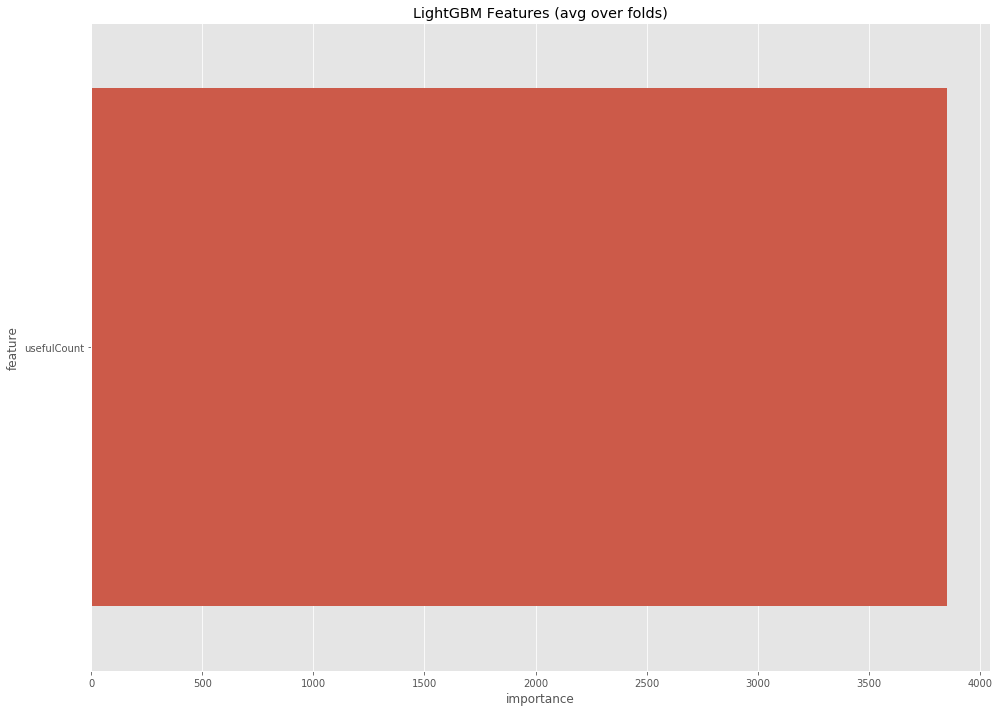

In [71]:
cols = feature_importance_df[["feature", "importance"]].groupby("feature").mean().sort_values(
    by="importance", ascending=False)[:50].index

best_features = feature_importance_df.loc[feature_importance_df.feature.isin(cols)]

plt.figure(figsize=(14,10))
sns.barplot(x="importance", y="feature", data=best_features.sort_values(by="importance", ascending=False))
plt.title('LightGBM Features (avg over folds)')
plt.tight_layout()
plt.savefig('lgbm_importances.png')

In [72]:
word_table = pd.read_csv("inquirerbasic.csv")

In [73]:
word_table.head()

,Entry,Source,Positiv,Negativ
0,A,H4Lvd,NaN,NaN
1,ABANDON,H4Lvd,NaN,Negativ
2,ABANDONMENT,H4,NaN,Negativ
3,ABATE,H4Lvd,NaN,Negativ
4,ABATEMENT,Lvd,NaN,NaN


In [74]:
temp_Positiv = []
Positiv_word_list = []
for i in range(0,len(word_table.Positiv)):
    if word_table.iloc[i,2] == "Positiv":
        temp = word_table.iloc[i,0].lower()
        temp1 = re.sub('\d+', '', temp)
        temp2 = re.sub('#', '', temp1) 
        temp_Positiv.append(temp2)

Positiv_word_list = list(set(temp_Positiv))
len(temp_Positiv)
len(Positiv_word_list)  #del temp_Positiv

#Negativ word list          
temp_Negativ = []
Negativ_word_list = []
for i in range(0,len(word_table.Negativ)):
    if word_table.iloc[i,3] == "Negativ":
        temp = word_table.iloc[i,0].lower()
        temp1 = re.sub('\d+', '', temp)
        temp2 = re.sub('#', '', temp1) 
        temp_Negativ.append(temp2)

Negativ_word_list = list(set(temp_Negativ))
len(temp_Negativ)
len(Negativ_word_list)

1915

1637

2291

2006

In [75]:
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(vocabulary = Positiv_word_list)
content = df_test['review_clean']
X = vectorizer.fit_transform(content)
f = X.toarray()
f = pd.DataFrame(f)
f.columns=Positiv_word_list
df_test["num_Positiv_word"] = f.sum(axis=1)

vectorizer2 = CountVectorizer(vocabulary = Negativ_word_list)
content = df_test['review_clean']
X2 = vectorizer2.fit_transform(content)
f2 = X2.toarray()
f2 = pd.DataFrame(f2)
f2.columns=Negativ_word_list
df_test["num_Negativ_word"] = f2.sum(axis=1)

In [76]:
df_test["Positiv_ratio"] = df_test["num_Positiv_word"]/(df_test["num_Positiv_word"]+df_test["num_Negativ_word"])
df_test["sentiment_by_dic"] = df_test["Positiv_ratio"].apply(lambda x: 1 if (x>=0.5) else (0 if (x<0.5) else 0.5))

df_test.head()

,uniqueID,drugName,condition,review,rating,date,usefulCount,review_clean,sentiment,day,year,month,Predict_Sentiment,count_sent,count_word,count_unique_word,count_letters,count_punctuations,count_words_upper,count_words_title,count_stopwords,mean_word_len,season,num_Positiv_word,num_Negativ_word,Positiv_ratio,sentiment_by_dic
147354,126702,Brimonidine,Rosacea,"""Never , never , never use this cream !!!!!! It doesn&#039;t help in any way !!!! I&#039;m so angry and disappointed because my face is extremely red after this cream!!! I finished my 6 months accutane and went to my derm because I have little red blemishes from acne. He gave me samples of this cream. I applied it at night. In the morning my face was like snow. I haven&#039;t seen my face like that before, but closer to the evening my face turned bright red .!! Now it&#039;s the second day after this cream and my face is still red. I&#039;m extremely disappointed in this cream !!!!! I want to sue the mircaso company !!!!!! How people can make such harmful products for face ???!!!""",1,2015-08-31,17,never never never use cream help way angri disappoint face extrem red cream finish month accutan went derm littl red blemish acn gave sampl cream appli night morn face like snow seen face like closer even face turn bright red second day cream face still red extrem disappoint cream want sue mircaso compani peopl make harm product face,0,31,2015,8,0.116667,1,58,41,335,58,5,11,54,4.793103,2,NaN,NaN,NaN,0.5
195249,84765,Ethinyl estradiol / norgestimate,Birth Control,"""I was switched to this after about 9 months of Mononessa. I didn&#039;t ask to switch it just happened. Anyways, I did not experience any side effects at all. My only small complaint is that my period doesn&#039;t start until mid-late Wednesday and it&#039;s just inconvenient because on Mononessa it start Monday night or Tuesday morning so I freak out a little bit over that. I do think it made my cramps less intense and my period lighter. It still lasts about 6 days although the last two days are almost nothing. I was afraid to switch but it wasn&#039;t bad so if you&#039;re in my shoes, think positively!""",10,2016-05-01,3,switch month mononessa ask switch happen anyway not experi side effect small complaint period start mid late wednesday inconveni mononessa start monday night tuesday morn freak littl bit think made cramp less intens period lighter still last day although last two day almost noth afraid switch bad shoe think posit,1,1,2016,5,-0.257407,1,50,42,314,27,6,14,50,5.300000,1,NaN,NaN,NaN,0.5
86265,71559,Vraylar,Bipolar Disorde,"""I began at 1.5 then titrated to 3mg dosage. At first, I loved the medicine, as it completely eliminated my depressive symptoms and helped regulate my sleep. However, after being on the medicine for two weeks, I developed Akisthesia and was told to stop. However, for those who do not experience TDS or EPS from the medicine, I imagine this will be a solid option to consider. Just be warned- the most common side effect listed is &quot;restlessness,&quot; which hit me hard and fast.""",3,2016-08-17,17,began titrat mg dosag first love medicin complet elimin depress symptom help regul sleep howev medicin two week develop akisthesia told stop howev not experi tds ep medicin imagin solid option consid warn common side effect list restless hit hard fast,0,17,2016,8,0.041667,1,41,38,251,20,6,9,41,5.146341,2,NaN,NaN,NaN,0.5
44172,132320,Ativan,Anxiety,"""Ativan 0.5mg calms me down considerably within 30 minutes, but the side effects are so bad that I can&#039;t continue to take it. I experienced EXTREME, loss of energy, tiredness, laziness, apathy, and increase in appetite. This might be okay for someone who&#039;s at home trying to recover from panic attacks, but not for me. I work 5 days a week and this past week that I was only taking 1 x 0.5mg pill a day was the absolute worst week I&#039;ve ever had at work, living in a fog and totally wiped out of energy. I hardly got ANYTHING done wh

In [ ]:
def userful_count(data):
    grouped = data.groupby(['condition']).size().reset_index(name='user_size')
    data = pd.merge(data,grouped,on='condition',how='left')
    return data
df_test =  userful_count(df_test) 
df_test['usefulCount'] = df_test['usefulCount']/df_test['user_size']

In [ ]:
df_test['deep_pred'] = sub_preds_deep
df_test['machine_pred'] = sub_preds

df_test['total_pred'] = (df_test['deep_pred'] + df_test['machine_pred'] + df_test['sentiment_by_dic'])*df_test['usefulCount']

In [ ]:
df_test = df_test.groupby(['condition','drugName']).agg({'total_pred' : ['mean']})
df_test